<a href="https://colab.research.google.com/github/AlumiK/tensorflow-notebooks/blob/main/TensorFlow2/07_cnn_cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN CIFAR-10

In [1]:
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [2]:
!nvidia-smi -L

GPU 0: GeForce RTX 2080 Ti (UUID: GPU-3cb47403-efa9-71ae-1700-c27de6cb0d0a)


In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
K = len(set(y_train.flatten()))

Epoch 1/15
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5029 - accuracy: 0.4541 - val_loss: 1.2229 - val_accuracy: 0.5550
Epoch 2/15
1563/1563 [==============================] - 3s 2ms/step - loss: 1.1811 - accuracy: 0.5780 - val_loss: 1.0996 - val_accuracy: 0.5987
Epoch 3/15
1563/1563 [==============================] - 3s 2ms/step - loss: 1.0124 - accuracy: 0.6398 - val_loss: 1.0124 - val_accuracy: 0.6354
Epoch 4/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.8842 - accuracy: 0.6853 - val_loss: 0.9402 - val_accuracy: 0.6723
Epoch 5/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.7796 - accuracy: 0.7227 - val_loss: 0.9037 - val_accuracy: 0.6861
Epoch 6/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.6812 - accuracy: 0.7586 - val_loss: 0.8816 - val_accuracy: 0.6999
Epoch 7/15
1563/1563 [==============================] - 3s 2ms/step - loss: 0.5971 - accuracy: 0.7859 - val_loss: 0.9052 - val_accuracy:

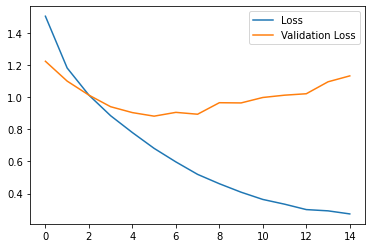

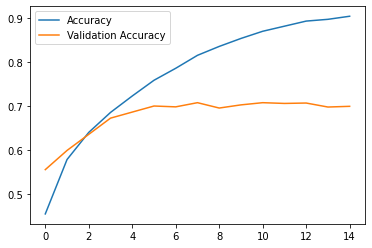

313/313 [==============================] - 0s 1ms/step - loss: 1.1320 - accuracy: 0.6992
Accuracy: 0.6991999745368958


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=X_train[0].shape),
    tf.keras.layers.Conv2D(32, (3, 3), strides=2, activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), strides=2, activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), strides=2, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(K, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

plt.plot(r.history.get('loss'), label='Loss')
plt.plot(r.history.get('val_loss'), label='Validation Loss')
plt.legend()
plt.show()

plt.plot(r.history.get('accuracy'), label='Accuracy')
plt.plot(r.history.get('val_accuracy'), label='Validation Accuracy')
plt.legend()
plt.show()

print(f'Accuracy: {model.evaluate(X_test, y_test)[1]}')

## Plot the confusion matrix

Confusion matrix, without normalization
[[749  35  40   9  29   6  14  10  58  50]
 [ 12 848   7   6   2   5  12   6  27  75]
 [ 78  14 558  49 103  47  99  27  13  12]
 [ 24  27  70 445  67 172 116  28  17  34]
 [ 24   4  54  62 667  32  78  56  12  11]
 [ 12   8  58 184  59 542  48  64   8  17]
 [  5   7  27  32  30  18 863   4   7   7]
 [ 15   7  34  45  59  54  17 729   3  37]
 [ 59  42  17  10   9   6  16   1 810  30]
 [ 29 121   8   6   6   4  12  12  21 781]]


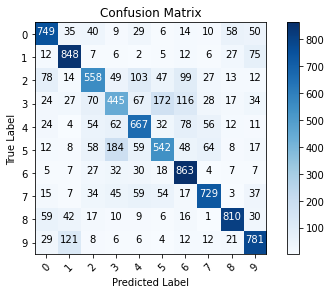

In [5]:
def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print('Normalized confusion matrix')
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment='center',
               color='white' if cm[i, j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(K)))

## Display a random misclassified image

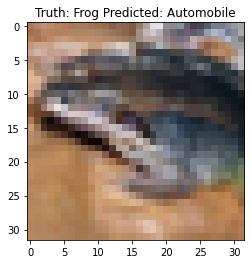

In [6]:
labels = [
    'Airplane', 
    'Automobile',
    'Bird',
    'Cat',
    'Deer',
    'Dog',
    'Frog',
    'Horse',
    'Ship',
    'Truck',
]
misclassified_idx = np.where(p_test != y_test)[0]
i =  np.random.choice(misclassified_idx)
plt.imshow(X_test[i])
plt.title(f'Truth: {labels[y_test[i]]} Predicted: {labels[p_test[i]]}')
plt.show()